# Householder transformation

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plot_functions as plf
import matcomp_algorithms as mca
np.set_printoptions(precision=3)
#np.set_printoptions(suppress=True)

### Definition

A *Householder trasformation* $\mathbf{P}$ (also known as *Householder reflection* or *Householder matrix*) is an $M \times M$ symmetric and orthogonal matrix given by:

<a id='eq1a'></a>
$$
\mathbf{P} = \mathbf{I} - \beta \, \mathbf{v} \cdot \mathbf{v}^{\top} \quad , \tag{1a}
$$

<a id='eq1b'></a>
$$
\beta = \frac{2}{\mathbf{v}^{\top}\mathbf{v}} \quad , \tag{1b}
$$

where $\mathbf{v}$ is called *Householder vector*.

### Create a vector $\mathbf{x}$ and a matrix $\mathbf{A}$

In [3]:
np.random.seed(6)
M = 13

In [4]:
x = np.random.rand(M)

In [5]:
A = np.random.rand(M,M)

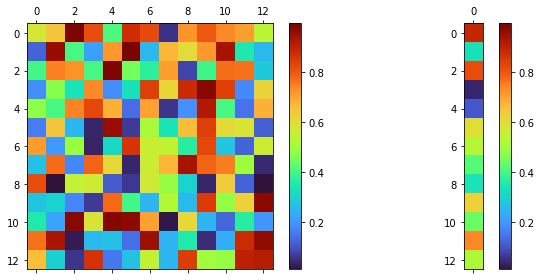

In [6]:
plf.plot_matrices(matrices=[A, x.reshape((M,1))], 
                  size=(8,4), tol=1e-15, shape=(1,2))

### Apply the Householder transformation to vector $\mathbf{x}$

The Householder transformation is an efficient way of introducing zeros in vectors or matrices. The following cells illustrate this by applying the Householder transformation to the vector $\mathbf{x}$.

#### Consider the entire vector $\mathbf{x}$

In [7]:
# Compute the Householder vector and parameter beta
v, beta = mca.House_vector(x)

In [8]:
# Create the Householder transformation
P = np.identity(M) - beta*np.outer(v,v)

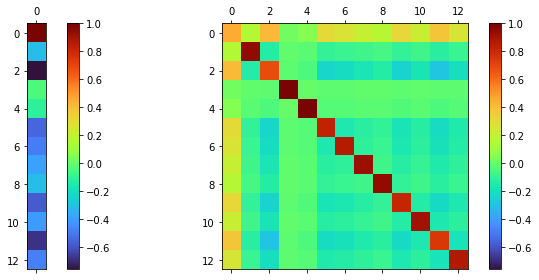

In [9]:
plf.plot_matrices(matrices=[v.reshape((M,1)), P], 
                  size=(12,4), tol=1e-15, shape=(1,2))

In [10]:
# Householder transformation is orthogonal
np.allclose(P.T@P, P@P.T)

True

In [11]:
# Householder transformation is orthogonal
np.allclose(np.identity(M), P@P.T)

True

In [12]:
# Compute the product Px 
# Function House_matvec requires x be a matrix
Px = mca.House_matvec(A=x.reshape((M,1)), v=v, beta=beta, order='PA')

In [13]:
np.allclose(Px[:,0], P@x)

True

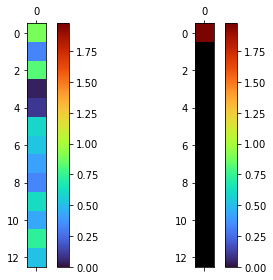

In [14]:
plf.plot_matrices(matrices=[x.reshape((M,1)), Px], 
                  size=(6,4), tol=1e-15, shape=(1,2))

In [15]:
# First element of Px equals x norm
np.allclose(Px[0,0], np.linalg.norm(x))

True

#### Consider a subvector of $\mathbf{x}$

In [17]:
# Compute the Householder vector and parameter beta
v, beta = mca.House_vector(x[4:])

In [18]:
# Create the Householder transformation
P = np.identity(M)
P[4:,4:] -= beta*np.outer(v,v)

In [19]:
# Compute the product Px 
# Function House_matvec requires x be a matrix
Px_subvector = x.copy().reshape((M,1))
Px_subvector[4:,:] = mca.House_matvec(A=Px_subvector[4:,:], v=v, beta=beta, order='PA')

In [20]:
np.allclose(Px_subvector[:,0], P@x)

True

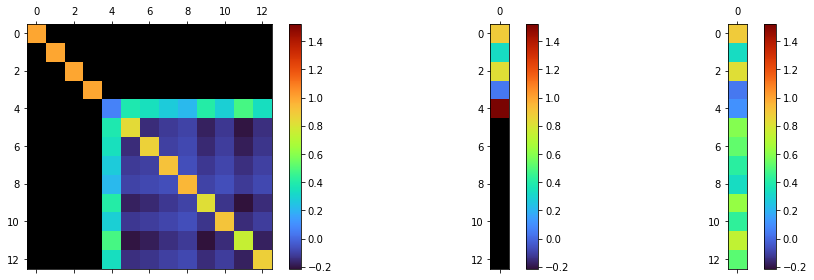

In [21]:
plf.plot_matrices(matrices=[P, Px_subvector, x.reshape((M,1))], 
                  size=(12,4), tol=1e-15, shape=(1,3))

In [22]:
# In this case, the element Px_subvector[4,0] equals the norm of the subvector x[4:]
np.allclose(Px_subvector[4,0], np.linalg.norm(x[4:]))

True

### Apply the Householder transformation to matrix $\mathbf{A}$

The following cells illustrate how the Householder transformation can be used to introduce zeros into specific columns of the matrix $\mathbf{A}$.

#### Consider the product $\mathbf{P} \mathbf{A}$

In [23]:
# Compute the Householder vector and parameter beta
# by using the first column of A
v, beta = mca.House_vector(A[:,0])

In [24]:
# Create the Householder transformation
P = np.identity(M) - beta*np.outer(v,v)

In [25]:
# Compute the product PA
# In this case, the transformation affects all rows of A
PA = mca.House_matvec(A=A, v=v, beta=beta, order='PA')

In [26]:
np.allclose(PA, P@A)

True

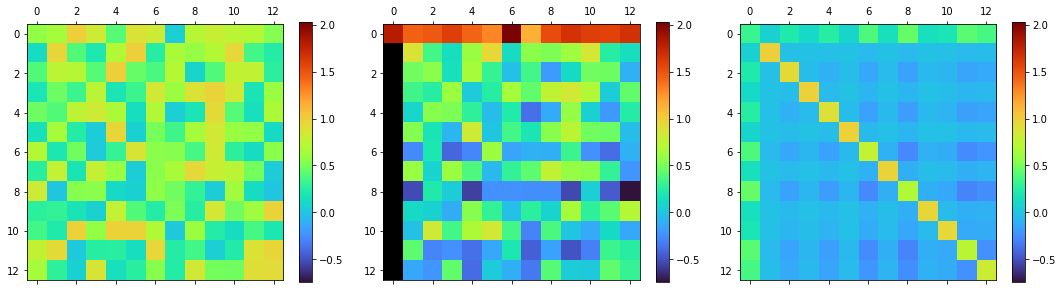

In [27]:
plf.plot_matrices(matrices=[A, PA, P], 
                  size=(15,4), tol=1e-15, shape=(1,3))

In [28]:
# First element of PA equals the norm of A[:,0]
np.allclose(PA[0,0], np.linalg.norm(A[:,0]))

True

#### Consider the product $\mathbf{P} \, (\mathbf{A}[4: \, , \, :])$

In [29]:
# Compute the Householder vector and parameter beta
# by using the subvector A[4:,3] of the 3rd column of A
v, beta = mca.House_vector(A[4:,3])

In [30]:
# Create the Householder transformation
P = np.identity(M)
P[4:,4:] -= beta*np.outer(v,v)

In [31]:
# Compute the product PA
# In this case, the product affects all the elements in [4:,:]
PA_submatrix = A.copy()
PA_submatrix[4:,:] = mca.House_matvec(A=A[4:,:], v=v, beta=beta, order='PA')

In [33]:
np.allclose(PA_submatrix, P@A)

True

In [34]:
# The rows :4 are not affected by the Householder transformation
np.allclose(PA_submatrix[:4,:], A[:4,:])

True

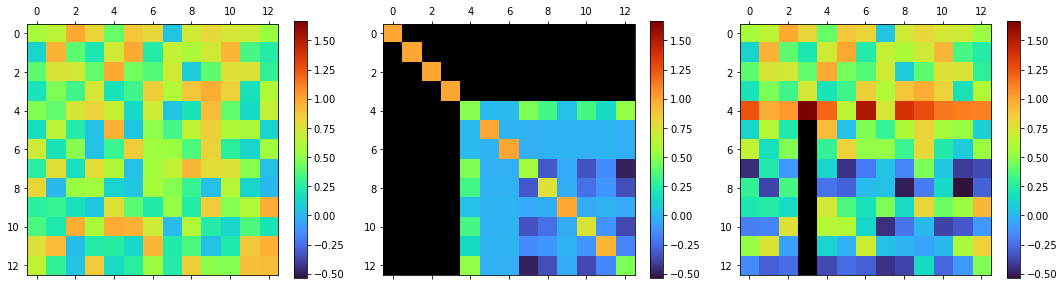

In [36]:
plf.plot_matrices(matrices=[A, P, PA_submatrix], 
                  size=(15,4), tol=1e-15, shape=(1,3))

In [37]:
# In this case, the element PA_submatrix[4,3] equals the norm of the subvector A[4:,3]
np.allclose(PA_submatrix[4,3], np.linalg.norm(A[4:,3]))

True

#### Consider the product $(\mathbf{A}[ \, : \, , \, 3:]) \, \mathbf{P}$

In [38]:
# Compute the Householder vector and parameter beta
v, beta = mca.House_vector(A[4,3:])

In [42]:
# Create the Householder transformation
P = np.identity(M)
P[3:,3:] -= beta*np.outer(v,v)

In [43]:
# Compute the product AP
# In this case, the product affects all the elements in [:,3:]
AP_submatrix = A.copy()
AP_submatrix[:,3:] = mca.House_matvec(A=A[:,3:], v=v, beta=beta, order='AP')

In [44]:
np.allclose(AP_submatrix, A@P)

True

In [45]:
# The columns :3 are not affected by the Householder transformation
np.allclose(AP_submatrix[:,:3], A[:,:3])

True

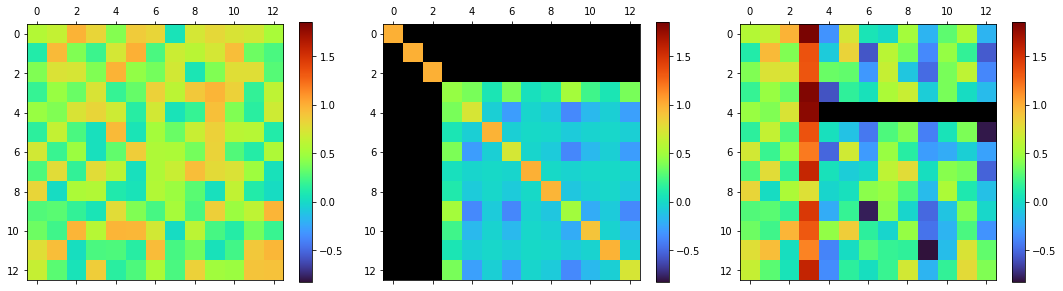

In [48]:
plf.plot_matrices(matrices=[A, P, AP_submatrix], 
                  size=(15,4), tol=1e-15, shape=(1,3))

In [49]:
# In this case, the element AP_submatrix[4,3] equals the norm of the subvector A[4:,3]
np.allclose(AP_submatrix[4,3], np.linalg.norm(A[4,3:]))

True